<a href="https://www.kaggle.com/code/antongalysh/pytorch-ipynb?scriptVersionId=247697659" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Тензор

Tensor - це багатовимірний масив даних в PyTorch. Він схожий на
Numpy array, але має ряд ключових відмінностей:

* **Підтримка GPU:** Тензори PyTorch можуть
    використовуватися на GPU
    для прискорення обчислень,
    що недоступно в Numpy.
* **Градієнти:** Тензори PyTorch
    підтримують градієнти,
    що робить їх зручними
    для використання в
    нейронних мережах.

# Створення тензорів

**З Numpy array**

In [1]:
import torch
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6]])
tensor_a = torch.from_numpy(a)

print(tensor_a, '\n')

print(f'{tensor_a.shape=}\n')

print(f'{tensor_a.size()=}')

tensor([[1, 2, 3],
        [4, 5, 6]]) 

tensor_a.shape=torch.Size([2, 3])

tensor_a.size()=torch.Size([2, 3])


**З списків:**

In [2]:
tensor_b = torch.tensor([[1, 2, 3], [4, 5, 6]])

tensor_b

tensor([[1, 2, 3],
        [4, 5, 6]])

**З функцій:**

In [3]:
tensor_c = torch.randn(3, 4)  # Випадкові числа
tensor_d = torch.zeros(3, 4)  # Нулі
tensor_e = torch.ones(3, 4)  # Одиниці

print(f'rand {tensor_c}\n')
print(f'zero {tensor_d}\n')
print(f'one {tensor_e}\n')

rand tensor([[-0.1371, -1.0778,  0.9155, -0.3525],
        [ 1.1436,  1.2266, -0.1097,  2.1867],
        [ 0.2168,  0.4426, -0.9390,  0.0848]])

zero tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

one tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])



# Індексування тензорів

In [4]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(f'{tensor=}\n')

# Отримати значення з тензора
value = tensor[0, 1]  # 2
print(f'{value=}\n')

# Отримати рядок
row = tensor[0]  # tensor([1, 2, 3])
print(f'{row=}\n')

# Отримати стовпець
column = tensor[:, 1]  # tensor([2, 5])
print(f'{column=}\n')

# Зміна значення
tensor[0, 1] = 10
print(f'{tensor=}\n')

# Зріз тензора
sub_tensor = tensor[0:2, 1:3]  # tensor([[2, 3], [5, 6]])
print(f'{sub_tensor=}\n')

tensor=tensor([[1, 2, 3],
        [4, 5, 6]])

value=tensor(2)

row=tensor([1, 2, 3])

column=tensor([2, 5])

tensor=tensor([[ 1, 10,  3],
        [ 4,  5,  6]])

sub_tensor=tensor([[10,  3],
        [ 5,  6]])



**1. `item()`:**

* Використовується для **отримання** **значення**
    з **скалярного тензора**(тобто просто число).
* **Не** використовується для тензорів
    з **більшою розмірністю**,
    тому що призведе до помилки.


In [5]:
value.item()

10

In [6]:
tensor.item()

RuntimeError: a Tensor with 6 elements cannot be converted to Scalar

**2. `numpy()`:**

* Використовується для **перетворення**
    тензора PyTorch в **Numpy array**.
* Може використовуватися для тензорів
    **з будь-якою розмірністю**.

In [ ]:
tensor.numpy()

#Арифметичні операції та функції

In [ ]:
tensor_a = torch.tensor([1, 2, 3])
tensor_b = torch.tensor([4, 5, 6])

# Додавання
tensor_c = tensor_a + tensor_b  # tensor([5, 7, 9])

# Множення
tensor_d = tensor_a * tensor_b  # tensor([4, 10, 18])

# Функції
tensor_e = torch.sin(tensor_a)  # tensor([0.84147099, 0.90929743, 0.14112001])

#Зміна розмірів

**`view`:** Зміна розміру тензора без зміни його даних.

Використовувати по можливості, якщо виникатимуть помилки, то використати `reshape`

In [ ]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(tensor)

# Зміна форми з (2, 3) на (3, 2)
tensor_view = tensor.view(3, 2)
print()
print(tensor_view)

In [ ]:
tensor_view += 1

tensor

**`reshape`:** Зміна розміру тензора з можливістю зміни його даних.

Згідно документації, коли можливо створює `view`

In [ ]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Зміна форми з (2, 3) на (3, 2)
tensor_view = tensor.reshape(3, 2)

In [ ]:
tensor_view += 1

tensor

# Device

**Device** в PyTorch - це абстракція,
що використовується для опису
**місця розташування** даних
тензора. Це може бути **CPU**
або **GPU**.

## Перегляд інформації про device:

* `torch.cuda.is_available()`:
    Перевіряє, чи доступний
    GPU.
* `torch.cuda.device_count()`:
    Отримує кількість
    доступних GPU.
* `torch.cuda.get_device_name(device)`:
    Отримує назву
    конкретного GPU.
* `.device`: Атрибут тензора,
    що показує, на
    якому device він
    розташований.

In [ ]:
print(torch.cuda.is_available())  # True/False

if torch.cuda.is_available():
    print(torch.cuda.device_count())  # Кількість GPU
    print(torch.cuda.get_device_name(0))  # Назва першого GPU

tensor = torch.tensor([1, 2, 3])
print(tensor.device)  # CPU

## Підключення тензора до device

* `.to(device)`: Переміщує
    тензор на
    заданий device.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tensor = torch.tensor([1, 2, 3])
tensor = tensor.to(device)

tensor

In [ ]:
device

In [ ]:
tensor = torch.tensor([1, 2, 3], device=device)
tensor

# Градієнтний спуск

## Задача мінімізації

Градієнтний спуск - це ітераційний алгоритм
для **оптимізації** **функції**,
що знаходить **мінімальне значення**
цієї функції.

**Формулювання задачі:**

* **Функція:** $f(x)$
* **Змінна:** $x$
* **Мета:** Знайти $x_{min}$, таке, що $f(x_{min}) \leq f(x)$ для всіх $x$

## Градієнт

**Градієнт** - це вектор,
що показує **напрямок**
**найбільшого зростання**
**багатовимірної**
**функції**.


Позначається так: $\nabla f(x)$

Щоб вказати, що для даного тензора потрібно вказати `requires_grad`

Примітка: лише для тензорів з даними типу `float`

In [ ]:
tensor1 = torch.tensor(1.0, requires_grad=True)
print(f'{tensor1=}')

# або через атрибут
tensor2 = torch.tensor([1., 2., 3.])
tensor2.requires_grad = True

print(f'{tensor2=}')
print(f'tensor2={tensor2}')

Для того, щоб вказати аби тензор не мав градієнта, використовують функцію `detach`

In [ ]:
tensor2.detach()

In [ ]:
tensor2

## Граф обчислень

Граф обчислень в PyTorch - це
динамічна структура даних,
що використовується
для представлення
операцій для обчислення градієнтів

In [ ]:
x = torch.tensor(2., requires_grad=True)
y = torch.tensor(3., requires_grad=True)
z = torch.tensor(4., requires_grad=True)

out = z*(x + y)

In [ ]:
out

In [ ]:
!pip install -q torchviz

In [ ]:
from torchviz import make_dot

dot = make_dot(out, params={'x': x, 'y':y, 'z':z, 'out':out})
dot


## Алгоритм градієнтного спуску

1. **Ініціалізація:**
  Виберіть початкове
  значення $x^{(0)}$.
2. **Ітерація:**
    * Розрахуйте градієнт $\nabla f(x^{(k)})$
      в поточній точці $x^{(k)}$.
    * Зробіть крок
      в **протилежному**
      до градієнта
      напрямку:
      
      $x^{(k+1)} = x^{(k)} - \alpha \nabla f(x^{(k)})$
      
      **Де:**
      
      * $\alpha$ - **швидкість**
        навчання
    * Повторіть
      кроки 2.1
      та 2.2
      до
      зближення
      з
      мінімумом.

![](https://ml-explained.com/articles/gradient-descent-explained/gradient_descent.gif)

![](https://upload.wikimedia.org/wikipedia/commons/a/a3/Gradient_descent.gif)

## Задача
Розв'яжіть рівняння $x^2-3x+4=3$
Основні кроки
* створити функцію f(x) = $x^2-3x+4$
* почати з довільного х, наприклад х=0
* визначити наскільки f(x) відрізняється від 3
* обрахувати градієнт помилки

In [8]:
def f(x):
  return x**2 - 3*x + 4

In [21]:
from torch.optim import SGD

# підкоючаємо процесор
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# вибираємо початкове значення
x = torch.tensor(0.0, requires_grad=True)

# швидкість навчання
learning_rate = 1e-3

# cстворення алгоритму
optimizer = SGD([x],  # список параметрів
                lr=learning_rate)

for t in range(2000):
    # обчислюємо функцію
    y = f(x)

    # обчислюємо наскільки y відрізняється від 3
    loss = (y-3)**2

    # обчислюємо всі потрібні градієнти
    loss.backward()

    # градієнтний спуск
    optimizer.step()
    optimizer.zero_grad()

    # вивід значення функції
    if t % 100 == 0:
      print(f'{loss.item()=}')

loss.item()=1.0
loss.item()=0.7067386507987976
loss.item()=0.5109565854072571
loss.item()=0.3761685788631439
loss.item()=0.28104832768440247
loss.item()=0.21254955232143402
loss.item()=0.16238699853420258
loss.item()=0.12513096630573273
loss.item()=0.09712886810302734
loss.item()=0.07586652785539627
loss.item()=0.05957961827516556
loss.item()=0.047009050846099854
loss.item()=0.0372425876557827
loss.item()=0.029610883444547653
loss.item()=0.023617202416062355
loss.item()=0.01888902299106121
loss.item()=0.015144464559853077
loss.item()=0.012168576009571552
loss.item()=0.0097963223233819
loss.item()=0.007900131866335869


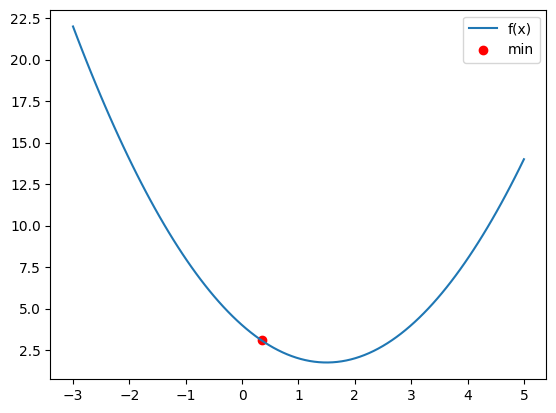

In [22]:
import matplotlib.pyplot as plt

xs = torch.linspace(-3, 5, 100)
plt.plot(xs.cpu(), f(xs).cpu(), label='f(x)')
plt.scatter(x.item(), f(x).item(), c='red', label='min')
plt.legend()

In [23]:
x

tensor(0.3468, requires_grad=True)

In [24]:
f(x)

tensor(3.0799, grad_fn=<AddBackward0>)

In [ ]:
loss = f(x)

dot = make_dot(loss, params={'x': x, 'f(x)': loss})
dot

# Спуск з моментом(додатково)

In [7]:
def f(x):
  return x**2/3 + torch.sin(torch.pi*x)

In [ ]:
# підкоючаємо процесор
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# вибираємо початкове значення
x = torch.tensor(2.0, requires_grad=True)

# швидкість навчання
learning_rate = 1e-1

# ініціалізація моменту
moment = torch.tensor(0.0)
beta = 0.99

for t in range(2000):
    # обчислюємо функцію яку потрібно мінімізувати
    loss = f(x)

    # обчислюємо всі потрібні градієнти
    loss.backward()

    # вивід значення функції
    if t % 100 == 0:
      print(f'{loss.item()=}')

    # градієнтний спуск
    with torch.no_grad():
      moment = beta*moment + learning_rate*x.grad
      x -= moment

      # очищуємо пам'ять для повторного обчислення градієнтів
      x.grad = None

In [ ]:
import matplotlib.pyplot as plt

xs = torch.linspace(-3, 5, 100)
plt.plot(xs.cpu(), f(xs).cpu(), label='f(x)')
plt.scatter(x.item(), f(x).item(), c='red', label='min')
plt.legend()